In [4]:
!pip install torch_geometric

In [5]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [6]:
df_history = pd.read_pickle('5_full_graphs.pkl')

In [7]:
# This function shows the sum of changes in opinion for each graph
def stat_one(df, g_number, op_number,step):
    total_dist = np.zeros((g_number,op_number))

    for j in range(g_number):
        # move over each graph
        rows = df_history.loc[df_history['graph_id'] == j]

        for i in range(19):
          # move over each opinion
          opinions = rows['best_opinion'].iloc[i]

          node_num = len(opinions)
          dist = torch.linalg.norm(rows['best_opinion'].iloc[i+1] - rows['best_opinion'].iloc[i])
          total_dist[j][i] += ((dist.item())/node_num)

    total_dist /= step
    return total_dist

In [8]:
# # This function shows the sum of changes in opinion for each graph
# def stat_one(df, g_number, op_number,step):
#     total_dist = np.zeros((g_number,op_number))
#     ops_ids = df_history['opnion_id'].unique()

#     for j in range(g_number):
#         # move over each graph
#         rows = df_history.loc[df_history['graph_id'] == j].reset_index(drop=True)

#         for id in ops_ids:
#           # move over each opinion
#           opinions = rows.loc[rows['opnion_id'] == id, 'opinion']

#           if len(opinions) > 1:
#             for i in range(len(opinions)-1):
#                 node_num = len(opinions.iloc[i])
#                 dist = torch.linalg.norm(opinions.iloc[i+1] - opinions.iloc[i])
#                 total_dist[j][id] += ((dist.item())/node_num)

#     total_dist /= step
#     return total_dist

In [9]:
def Hist_op(data):
  sns.histplot(data, bins=30, kde=True, color='green', edgecolor='red')

  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.title("Histogram of distance")
  plt.show()

In [11]:
distance = stat_one(df_history,5, 20, 100)

#**Metric One :**
 It shows the total distance of all opinion in 100 iteration.


*   **Histogram:** the frequency of different opinion distances over the 1400 data (70 graphs and 20 total opinion distances for each fraph)
*   **Box Plot:** the frequency of opinion distance for each graph.
*   **Line Plot:** combination of mean and variance of opinion distance for each graph





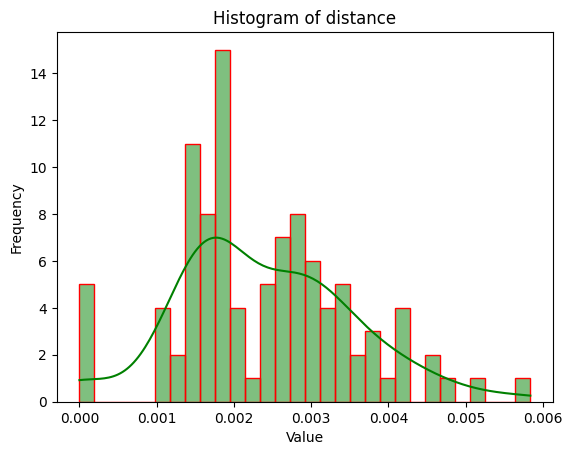

In [12]:
data = distance.reshape(-1)
Hist_op(data)

In [13]:
def Box_plot(data):
  plt.figure(figsize=(20, 6))
  plt.boxplot(data, vert=True, patch_artist=True)

  plt.xlabel("Graph ID")
  plt.ylabel("Distance")
  plt.title("Box Plot of Distances for 70 Graphs (20 distances each)")
  plt.show()

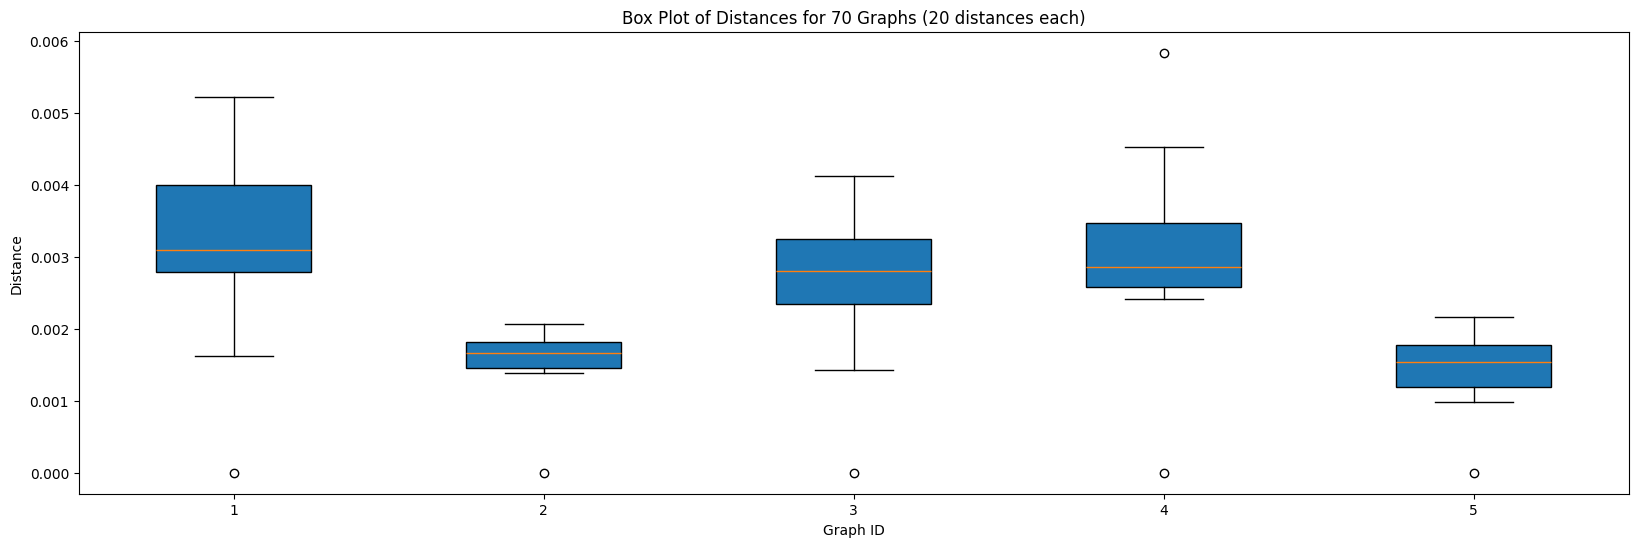

In [14]:
Box_plot(distance.T)

In [15]:

def mean_var(data):
    row_means = np.mean(data, axis=1)
    row_variances = np.var(data, axis=1)

    fig, ax1 = plt.subplots(figsize=(10,5))

    # ---- Left axis: Mean ----
    ax1.plot(row_means, label='Mean', linewidth=2)
    ax1.set_xlabel('Graph index (0–69)')
    ax1.set_ylabel('Mean')
    ax1.grid(True)

    # ---- Right axis: Variance ----
    ax2 = ax1.twinx()
    ax2.plot(row_variances, label='Variance', linestyle='--', color='orange')
    ax2.set_ylabel('Variance (scientific)')
    ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    # ---- Title ----
    plt.title('Mean and Variance of Distances per Graph')

    # ---- Combined legend ----
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

    plt.show()


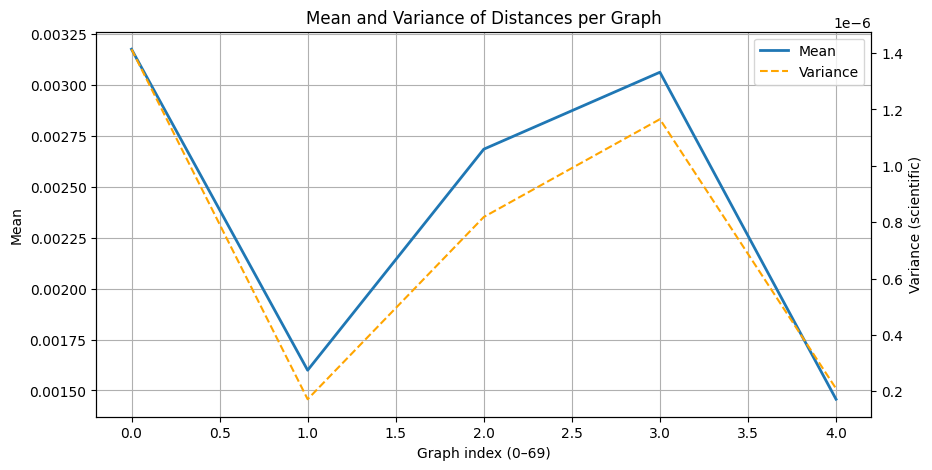

In [16]:
mean_var(distance)

#**Metric Two :**
 It shows the distance of initial opinion and the last opinion for each graph.


*   **Histogram:** the frequency of different distances over the 1400 data (70 graphs and 20 global distances for each fraph)
*   **Box Plot:** the frequency of global distance for each graph.
*   **Line Plot:** combination of mean and variance of global distance for each graph





In [17]:
# # This function calculate the distance between initial opinion and last opinion for each graph
# def stat_two(df, g_number, op_number, step):
#     global_dist = np.zeros((g_number,op_number))
#     ops_ids = df_history['opnion_id'].unique()

#     for j in range(g_number):
#         # move over each graph
#         rows = df_history.loc[df_history['graph_id'] == j].reset_index(drop=True)

#         for id in ops_ids:
#           # move over each opinion
#           opinions = rows.loc[rows['opnion_id'] == id, 'opinion']
#           init_opinion = rows.loc[rows['opnion_id'] == id, 'init_ops']

#           if len(opinions) > 1:

#             init_op = torch.tensor(list(init_opinion.iloc[0]), dtype=torch.float32)
#             dist = torch.linalg.norm(init_op - opinions.iloc[-1])

#             global_dist[j][id] = dist.item()

#     return (global_dist/step)

In [20]:
import ast

def parse_tensor(x):
    arr = ast.literal_eval(
        x.replace("tensor(", "").replace(")", "")
    )
    return torch.tensor(arr)

df_graphs = pd.read_csv('df_history_new.csv')
df_graphs["init_ops"] = df_graphs["init_ops"].apply(parse_tensor)

In [19]:
# This function calculate the distance between initial opinion and last opinion for each graph
def stat_two(df, g_number, op_number, step):
    global_dist = np.zeros((g_number,op_number))

    for j in range(g_number):
        # move over each graph
        rows = df_history.loc[df_history['graph_id'] == j]

        for id in range(20):
          # move over each opinion
          opinions = rows['best_opinion'].iloc[id]
          init_opinion = rows[ 'init_ops'].iloc[id]

          # init_op = torch.tensor(list(init_opinion.iloc[0]), dtype=torch.float32)
          dist = torch.linalg.norm(init_opinion - opinions)

          global_dist[j][id] = dist.item()

    return (global_dist/step)

In [21]:
global_distance = stat_two(df_history,5,20, 100)

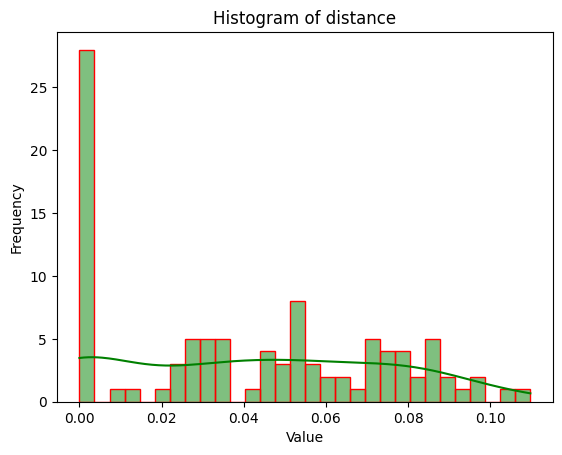

In [22]:
global_data = global_distance.reshape(-1)
Hist_op(global_data)

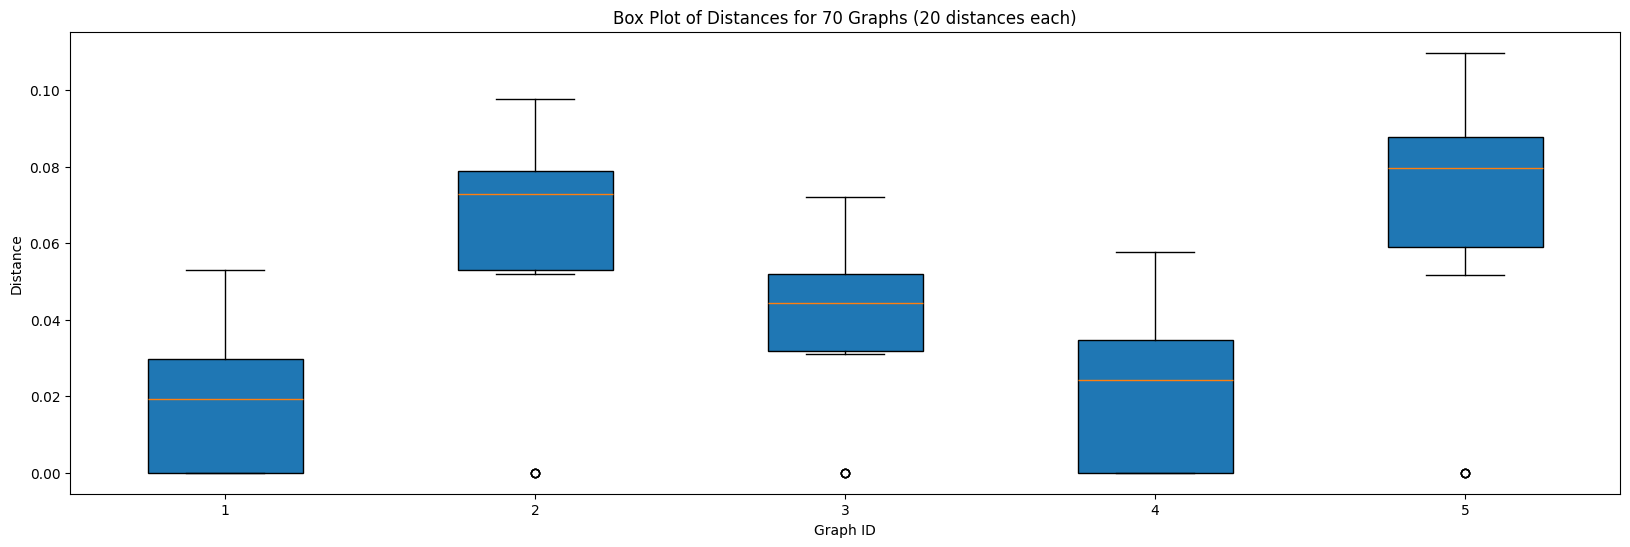

In [23]:
Box_plot(global_distance.T)

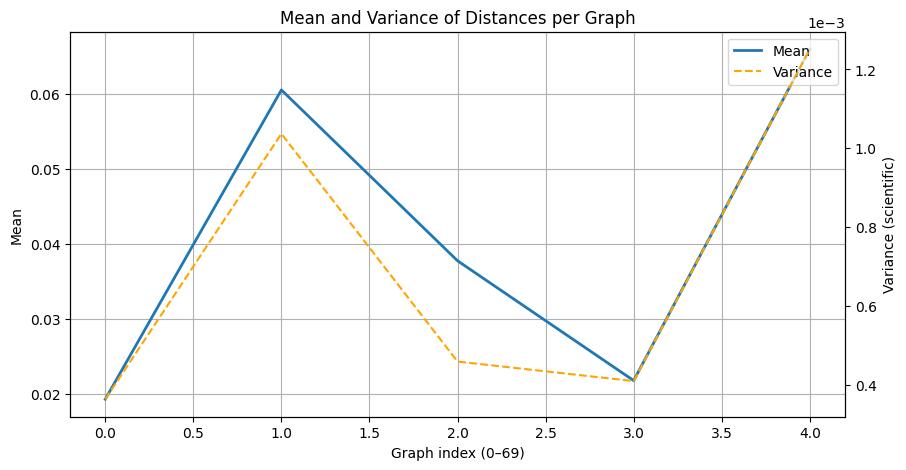

In [24]:
mean_var(global_distance)

#**Stack Bar of opinion distribution**

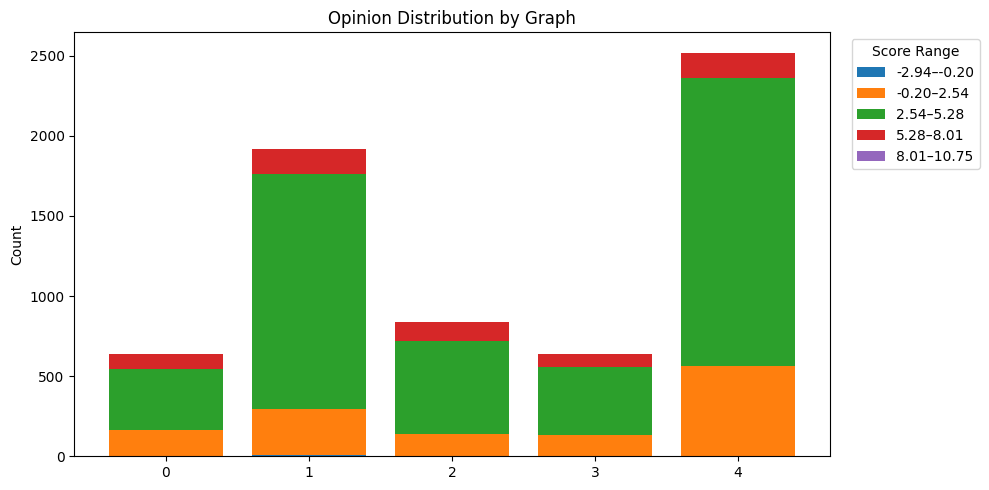

In [26]:
all_ops = np.concatenate(df_history['best_opinion'].values)
min_val, max_val = all_ops.min(), all_ops.max()

num_bins = 5
bins = np.linspace(min_val - 1, max_val + 1, num_bins + 1)
labels = [f"{bins[i]:.2f}–{bins[i+1]:.2f}" for i in range(num_bins)]

# --- build one histogram per graph_id ---
graph_ids = np.sort(df_history['graph_id'].unique())

data = []
for gid in graph_ids:
    ops_g = np.concatenate(df_history.loc[df_history['graph_id'] == gid, 'best_opinion'].values)
    data.append(np.histogram(ops_g, bins=bins)[0])

data = np.array(data)  # shape: (n_graphs, num_bins)

# --- stacked bar plot ---
x = np.arange(len(graph_ids))
bottom = np.zeros(len(graph_ids))

plt.figure(figsize=(10, 5))
for i, label in enumerate(labels):
    plt.bar(x, data[:, i], bottom=bottom, label=label)
    bottom += data[:, i]

plt.xticks(x, graph_ids)
plt.ylabel("Count")
plt.title("Opinion Distribution by Graph")
plt.legend(title="Score Range", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()
